In [1]:
import pandas as pd
import argparse
import numpy as np
import pickle

orig_file = "/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/experiments/20211102/volume_label_with_file_path_with_age_20211102.tsv"

orig_file_df = pd.read_csv(orig_file, sep='\t', index_col=0)
orig_file_df


,Session,Subject,Label,Age,Path
0,100039817943,210909b9725245c5a09e052b931447f4,0,52,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
1,100402864124,fc9d3132547b40d88b14b49f22059a7d,0,58,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
2,100402864124,fc9d3132547b40d88b14b49f22059a7d,0,58,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
3,100561623079,19a7816500184206baae665fb54d9486,1,64,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
4,100705385639,4c1833793b70449da1017a8eb7592b12,2,77,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
...,...,...,...,...,...
3231,998819920173,bbc73dd2480442108e5307511a1b9b75,1,54,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
3232,998819920173,bbc73dd2480442108e5307511a1b9b75,1,54,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
3233,998819920173,bbc73dd2480442108e5307511a1b9b75,1,54,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...
3234,999155686841,b3ddd61266c842a9b98597579f1054df,0,56,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...


In [ ]:
subjects = list(set(orig_file_df.Subject.to_list()))
len(subjects)

1182

In [ ]:
subjects = np.random.RandomState(seed=42).permuation(subjects, random_state=1)

In [ ]:
train_subject = subjects[:int(len(subject) * .7)]
val_subject = subjects[int(len(subject) * .7): int(len(subject) * .85)]
test_subject = subjects[int(len(subject) * .85):]

In [ ]:
train_df = orig_file_df[orig_file_df.Subject.isin(train_subject)]
val_df = orig_file_df[orig_file_df.Subject.isin(val_subject)]
test_df = orig_file_df[orig_file_df.Subject.isin(test_subject)]

print('Train shape: {}, val shape: {}, test shape: {}'.format(tran_df.shape, val_df.shape, test_df.shape))


In [ ]:
orig_file_name = arguments.orig_file.split('.')[0]
train_df.to_csv(orig_file_name + 'train.tsv', sep='\t')
val_df.to_csv(orig_file_name + 'val.tsv', sep='\t')
test_df.to_csv(orig_file_name + 'test.tsv', sep='\t')

In [2]:
import pandas as pd
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
from nilearn import image
import ants
from datetime import datetime, timedelta
import pydicom as dicom
import pickle
import matplotlib.image as mpimg
from collections import defaultdict, Counter
from scipy import stats

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-66i6bpa5 because the default path (/gpfs/home/lc3424/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
f1 = '/gpfs/data/razavianlab/data/mri/nyu/barlow_bids_t1_preprocess_lin/subjects/sub-0a2b22da7f004536adef5ac670d443c2/ses-184837540961/t1_linear/sub-0a2b22da7f004536adef5ac670d443c2_ses-184837540961_20111111-SAG_MPR-2_T1w_space-MNI152NLin2009cSym_desc-Crop_res-1x1x1_T1w.nii.gz'
f2 = '/gpfs/data/razavianlab/data/mri/nyu/barlow_bids_t1_preprocess_lin/subjects/sub-0a2b22da7f004536adef5ac670d443c2/ses-184837540961/t1_linear/sub-0a2b22da7f004536adef5ac670d443c2_ses-184837540961_20111111-SAG_MPR-2_T1w_space-MNI152NLin2009cSym_res-1x1x1_affine.mat'
f3 = '/gpfs/data/razavianlab/data/mri/nyu/barlow_bids_t1_preprocess_lin/subjects/sub-0a2b22da7f004536adef5ac670d443c2/ses-184837540961/t1_linear/sub-0a2b22da7f004536adef5ac670d443c2_ses-184837540961_20111111-SAG_MPR-2_T1w_space-MNI152NLin2009cSym_res-1x1x1_T1w.nii.gz'

(169, 208, 179)

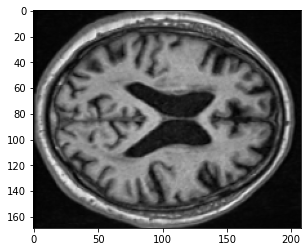

In [4]:
# cropped
file = nib.load(f1)
img = file.get_fdata()
plt.imshow(img[:,:,100], cmap='gray')
img.shape

(193, 229, 193)

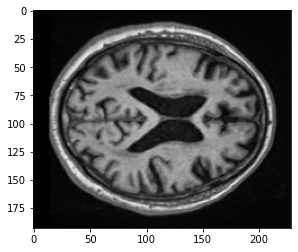

In [5]:
# not cropped

file = nib.load(f3)
img = file.get_fdata()
plt.imshow(img[:,:,100], cmap='gray')
img.shape

In [19]:
import torch

In [21]:
best_model_dir = '/gpfs/home/lc3424/capstone/2021_dementia/lc3424_workspace/experiments/20211102/saved_model/'
model_name = 'age_expansion_8'
pretrained_dict = torch.load(best_model_dir+model_name + '_model_low_loss.pth.tar',map_location='cpu')['state_dict']
pretrained_dict = {k[6:]: v for k, v in pretrained_dict.items() if 'classifier.classifier.LinearClassifier' not in k}
pretrained_dict.keys()

dict_keys(['image_embedding_model.conv.conv0_s1.weight', 'image_embedding_model.conv.conv0_s1.bias', 'image_embedding_model.conv.conv1_s1.weight', 'image_embedding_model.conv.conv1_s1.bias', 'image_embedding_model.conv.conv2_s1.weight', 'image_embedding_model.conv.conv2_s1.bias', 'image_embedding_model.conv.conv3_s1.weight', 'image_embedding_model.conv.conv3_s1.bias', 'image_embedding_model.fc6.fc6_s1.weight', 'image_embedding_model.fc6.fc6_s1.bias', 'image_embedding_model.age_encoder.pe', 'image_embedding_model.age_encoder.fc6.fc6_s1.weight', 'image_embedding_model.age_encoder.fc6.fc6_s1.bias', 'image_embedding_model.age_encoder.fc6.lrn0_s1.weight', 'image_embedding_model.age_encoder.fc6.lrn0_s1.bias', 'image_embedding_model.age_encoder.fc6.fc6_s3.weight', 'image_embedding_model.age_encoder.fc6.fc6_s3.bias'])

In [22]:
fc = ['classifier.classifier.LinearClassifier', 'classifier.classifier.LinearClassifier2']

In [3]:
d = pickle.load(open('res.pkl', 'rb'))
d.keys()

dict_keys(['res', 'out'])

In [4]:
res = d['res']
out = d['out']

In [12]:
label = np.argmax(out, axis=1)
label

array([2, 2, 2, ..., 1, 0, 0])

In [23]:
# res.drop('Unnamed: 0', axis=1, inplace=True)
res['label_pred'] = label
res[['score_0', 'score_1', 'score_2']] = out
# res.drop('Label', axis=1, inplace=True)
res

,Subject,Session,Path,label_pred,score_0,score_1,score_2
0,26a0b76ad3804709969fc4ee26bb6a35,146241246534,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,2,-0.925195,0.271650,0.563228
1,26a0b76ad3804709969fc4ee26bb6a35,146241246534,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,2,-0.976678,0.273222,0.609409
2,26a0b76ad3804709969fc4ee26bb6a35,146241246534,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,2,-1.005742,0.266612,0.648635
3,26a0b76ad3804709969fc4ee26bb6a35,148803941489,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,2,-2.851354,0.317034,2.415962
4,23d448d44b6d405db15b2d7c39530bf1,620076860576,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,0,1.700664,0.128906,-1.933229
...,...,...,...,...,...,...,...
7102,92a60c6773744442bf8a5384d245a4a4,227760717173,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,0,1.334482,0.122557,-1.554035
7103,8f4775b55c434d6d933942eb0cc36108,864946661458,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,1,-0.054432,0.197852,-0.220272
7104,8f4775b55c434d6d933942eb0cc36108,864946661458,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,1,0.045911,0.186556,-0.313244
7105,f66300b6f0154904b830d4354ed9b68a,279917155131,/gpfs/data/razavianlab/data/mri/nyu/barlow_bid...,0,1.547597,0.193485,-1.810318


In [18]:
res.label_pred.value_counts()

0    5299
1     985
2     823
Name: label_pred, dtype: int64

In [24]:
res.to_csv('linear_crop_label_predict.tsv', index=False, sep='\t')